In [ ]:
#%%shell
#jupyter nbconvert --to html /content/Investigate_a_Dataset_TMDb_Movie_Data.ipynb

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

# **Investigate a Dataset - TMDb Movie Data**

**Table of content** 

1. Introduction
2. Questions
3. Data Wrangling
4. Exploratory Data Analysis 
5. Conclusion
6. Limitation
7. Reference



# **Introduction** 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.





*   Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
*   There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is
*   The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


# **Questions**



*   Which genres are most popular from year to year?
*   Which movies are the most profitable?

*  What is the percentage of all genres?
*   Which actors acted the most movies from 1960 to 2015?
*  Which movies have the highest Average Votes?
*  Which movies have the highest Popularity?
* Which directors have the highest popularity from year to year?
*   Which director have the highest popularity?
*  Which directors are the most profitable?



In [ ]:
path = 'tmdb-movies.csv'

In [ ]:
df_tmdb = pd.read_csv(path, index_col='id')
# convert release date to datetime
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


# **Data Wrangling**



*   check and remove missing value 
*   check and remove duplicate values
*   convert to appropriate  datatype



In [ ]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               10856 non-null  object        
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   homepage              2936 non-null   object        
 7   director              10822 non-null  object        
 8   tagline               8042 non-null   object        
 9   keywords              9373 non-null   object        
 10  overview              10862 non-null  object        
 11  runtime               10866 non-null  int64         
 12  genres                10843 non-null  object        
 13  production_

In [ ]:
# Check for missing values
df_tmdb.isna().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The following columns will be removed from the analysis


*   Homepage
*   Tagline
*   Keywords
*   Overview
*   Production_companies



In [ ]:
# Drop columns with >1000 null values
df_tmdb.drop(columns = ['imdb_id','homepage','tagline','overview','keywords', 'production_companies'],inplace=True,axis = 1)
# Drop null rows
df_tmdb.dropna(inplace=True)

In [ ]:
# Check for duplicate rows
df_tmdb.duplicated().sum()
# Remove duplicate rows
df_tmdb.drop_duplicates(inplace=True)

In [ ]:
# 10,731 examples with 14 columns will be used in the analysis
df_tmdb.shape

(10731, 14)

**After  removing missing and duplicate values, 10731 examples with 14attributes(columns) will be used for the analysis.**

# **Which genres are most popular from year to year?**

In [ ]:
df_tmdb['genres'].nunique()
df_tmdb['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

There are 2022 unique combinationations of genres out of the following possible genres: ['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [ ]:
df_tmdb_copy = df_tmdb.copy()

In [ ]:
def seperator(x):
   return x.split('|')

In [ ]:
df_tmdb_copy['genres']=df_tmdb_copy ['genres'].apply(seperator)
df_tmdb_copy['genres'][:3]

id
135397    [Action, Adventure, Science Fiction, Thriller]
76341     [Action, Adventure, Science Fiction, Thriller]
262500            [Adventure, Science Fiction, Thriller]
Name: genres, dtype: object

In [ ]:
# Get genre with the highest popularity per year
df_genre = df_tmdb_copy.explode('genres')[['popularity', 'genres','release_year']]
df_genre_grouped = df_genre.groupby(['release_year', 'genres']).mean()
popular_yearly = df_genre_grouped.groupby(level='release_year')['popularity'].nlargest(1).to_frame()
popular_yearly.reset_index(level=2, inplace=True)
popular_yearly[41:]#.head()

,,genres,popularity
release_year,release_year,,
2001,2001,Fantasy,1.565260
2002,2002,Fantasy,1.430465
2003,2003,Fantasy,1.747524
2004,2004,Fantasy,1.320568
2005,2005,Fantasy,1.146827
2006,2006,Fantasy,1.023134
2007,2007,Fantasy,0.957349
2008,2008,Adventure,1.008385
2009,2009,Adventure,1.153656


In [ ]:
# from the year 1960 to 2015 the genre Adventure is popular 14 times
popular_yearly['genres'].value_counts()

Adventure          14
Animation          11
Fantasy             8
Crime               5
War                 3
Family              3
Music               2
Mystery             2
Action              2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genres, dtype: int64

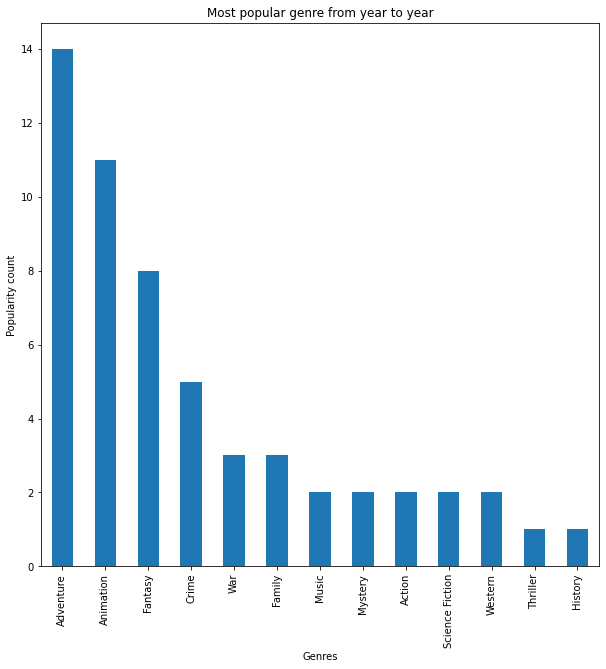

In [ ]:
popular_yearly['genres'].value_counts().plot.bar(xlabel='Genres', ylabel='Popularity count', title='Most popular genre from year to year')
plt.show()

**From the year 1960-2015 'Adventure','Animation' and 'Fantasy' were the most popular year to year with the count of 14, 11, and 8 respectively.**

# **Which movies are the most profitable?**


In [ ]:
df_tmdb_copy['profit']=df_tmdb_copy['revenue']-df_tmdb_copy['budget']
profitable_movies = df_tmdb_copy.sort_values(by='profit', ascending = False)[['original_title','profit']][:15].reset_index(drop=True)
profitable_movies

,original_title,profit
0,Avatar,2544505847
1,Star Wars: The Force Awakens,1868178225
2,Titanic,1645034188
3,Jurassic World,1363528810
4,Furious 7,1316249360
5,The Avengers,1299557910
6,Harry Potter and the Deathly Hallows: Part 2,1202817822
7,Avengers: Age of Ultron,1125035767
8,Frozen,1124219009
9,The Net,1084279658


In [ ]:
profitable_movies.set_index('original_title', inplace=True)

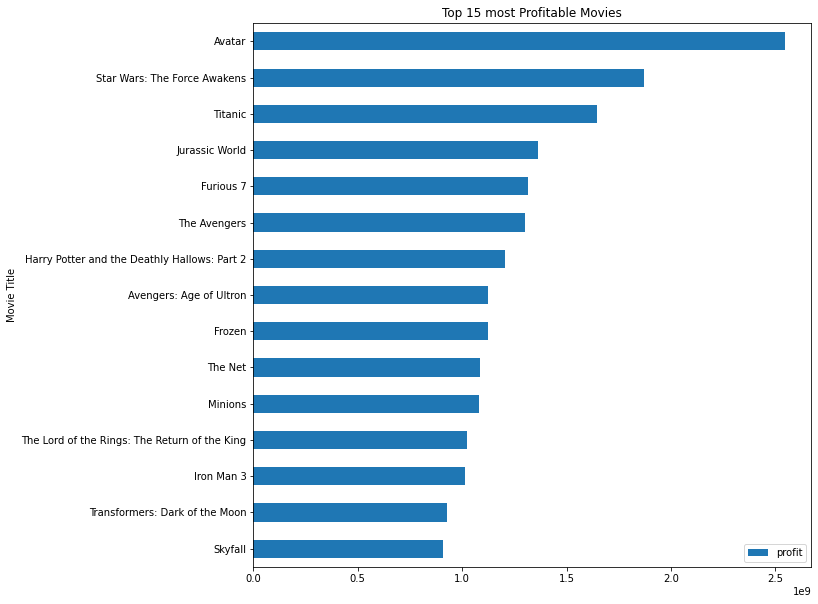

In [ ]:
profitable_movies.sort_values('profit').plot.barh(xlabel='Movie Title', ylabel='Profit', title='Top 15 most Profitable Movies')
plt.show()

**The most profitable movie is AVATAR with $2.544 billion profit**

# **What is the percentage of all genres?**



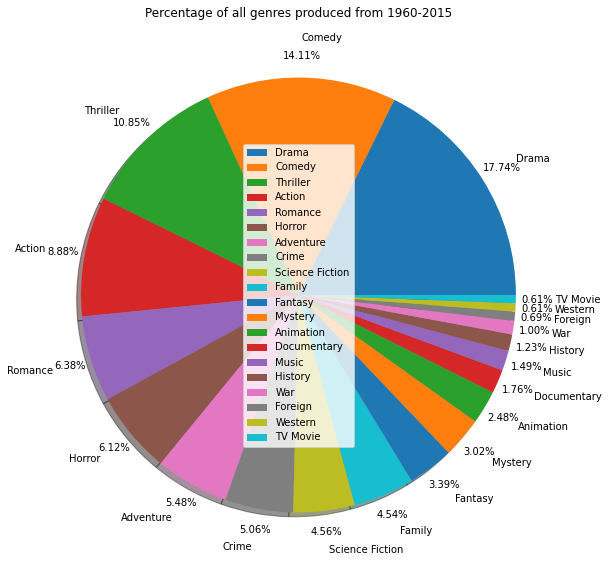

In [ ]:
plt.title(label='Percentage of all genres produced from 1960-2015')
genres = df_genre['genres'].value_counts()
plt.pie(genres, labels=genres.index, pctdistance=1.1, shadow=True, labeldistance=1.18, autopct='%1.2f%%')
plt.legend(loc=10)
plt.show()

There are 20 unique genre in the dataset. Drama, Comedy and Thriller are the most produced movie genre with 17.14%, 14.11% and 10.85% respectively

# **Which actors acted the most movies from 1960 to 2015?**

In [ ]:
df_tmdb_copy['cast']=df_tmdb_copy ['cast'].apply(seperator)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Christopher Walken    46
Gene Hackman          46
Name: cast, dtype: int64


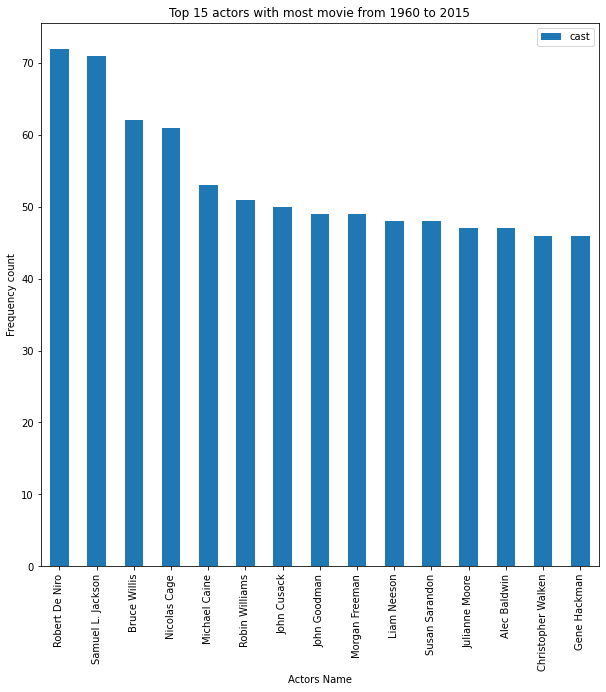

In [ ]:
df_cast = df_tmdb_copy.explode('cast')[['popularity', 'cast','release_year']]
df_cast['cast'].value_counts()[:15].plot.bar(xlabel='Actors Name', ylabel='Frequency count', title='Top 15 actors with most movie from 1960 to 2015')
print(df_cast['cast'].value_counts()[:15])
plt.legend()

Robert De Niro, Samuel L.Jackson and Bruce Willis acted the most movies from 1960-2015 

# **Which movies have the highest Average Votes?**

In [ ]:
df_vote_average = df_tmdb_copy[['original_title', 'runtime', 'vote_average','release_year','popularity','revenue','budget', 'profit']]
vote_average = df_vote_average.sort_values(by='vote_average', ascending = False)[['original_title', 'vote_average','runtime', 'release_year']][:15].reset_index(drop=True)
vote_average

,original_title,vote_average,runtime,release_year
0,The Story of Film: An Odyssey,9.2,900,2011
1,Black Mirror: White Christmas,8.8,74,2014
2,Pink Floyd: Pulse,8.7,145,2006
3,The Art of Flight,8.5,80,2011
4,A Personal Journey with Martin Scorsese Throug...,8.5,225,1995
5,Dave Chappelle: Killin' Them Softly,8.5,57,2000
6,Queen - Rock Montreal,8.5,138,1981
7,The Shawshank Redemption,8.4,142,1994
8,Rush: Beyond the Lighted Stage,8.4,107,2010
9,The Jinx: The Life and Deaths of Robert Durst,8.4,240,2015


In [ ]:
correlation = df_vote_average.sort_values(by='vote_average', ascending = False)[['original_title', 'runtime', 'vote_average','popularity','revenue','budget', 'profit']].corr()
correlation

,runtime,vote_average,popularity,revenue,budget,profit
runtime,1.000000,0.177276,0.138278,0.164276,0.192168,0.137497
vote_average,0.177276,1.000000,0.217906,0.178477,0.087318,0.188220
popularity,0.138278,0.217906,1.000000,0.662843,0.544240,0.628699
revenue,0.164276,0.178477,0.662843,1.000000,0.734487,0.976173
budget,0.192168,0.087318,0.544240,0.734487,1.000000,0.569730
profit,0.137497,0.188220,0.628699,0.976173,0.569730,1.000000


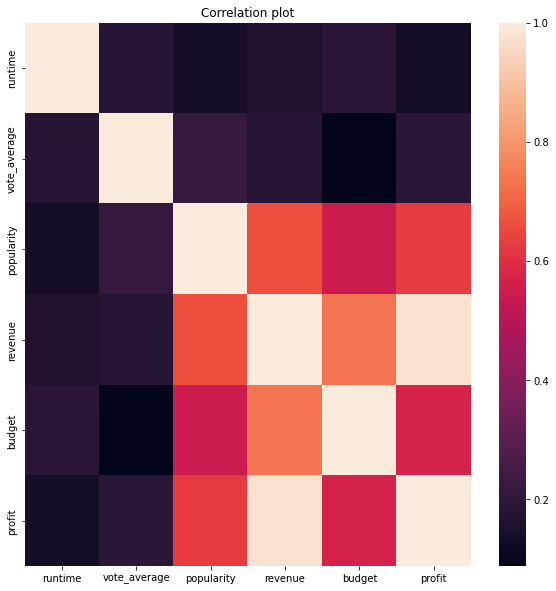

In [ ]:
sns.heatmap(correlation)
plt.title('Correlation plot')
plt.show()

The Story of Film: An Odyssey, Black Mirror: White Christmas and Pink Floyd: Pulse are the movies with top 3 highest vote average

# **Which movies have the highest Popularity?**


In [ ]:
df_vote_average = df_tmdb_copy[['original_title', 'runtime', 'vote_average','release_year','popularity','revenue','budget', 'profit']]
popular_movies = df_vote_average.sort_values(by='popularity', ascending = False)[['original_title','popularity','runtime','release_year']][:15].reset_index(drop=True)
popular_movies

,original_title,popularity,runtime,release_year
0,Jurassic World,32.985763,124,2015
1,Mad Max: Fury Road,28.419936,120,2015
2,Interstellar,24.949134,169,2014
3,Guardians of the Galaxy,14.311205,121,2014
4,Insurgent,13.112507,119,2015
5,Captain America: The Winter Soldier,12.971027,136,2014
6,Star Wars,12.037933,121,1977
7,John Wick,11.422751,101,2014
8,Star Wars: The Force Awakens,11.173104,136,2015
9,The Hunger Games: Mockingjay - Part 1,10.739009,123,2014


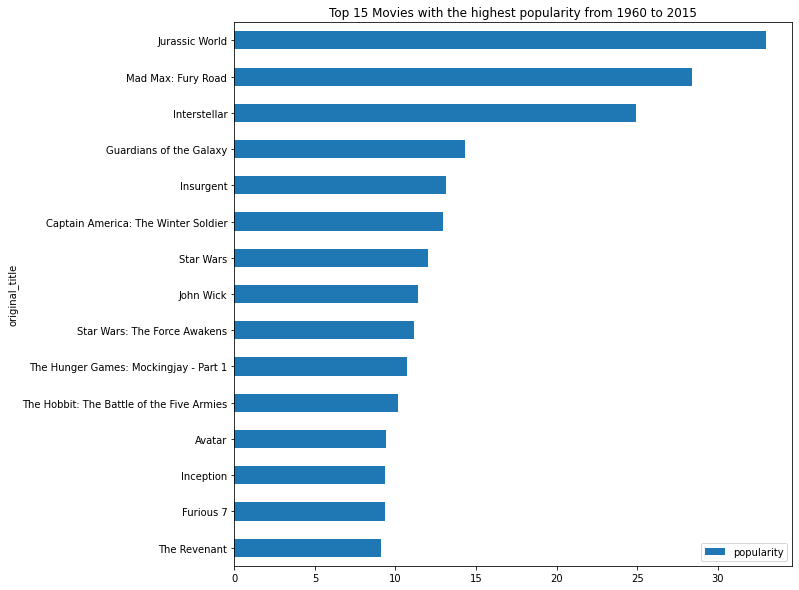

In [ ]:
popular_movies = popular_movies[['original_title', 'popularity']].set_index('original_title')
popular_movies.sort_values('popularity').plot.barh(title='Top 15 Movies with the highest popularity from 1960 to 2015')
plt.show()

**Jurassic World, Mad Max: Fury Road and Interstellar are the most popular movies**

# **Which directors have the highest popularity from year to year?**


In [ ]:
df_tmdb_copy['director']=df_tmdb_copy ['director'].apply(seperator)

In [ ]:
df_director = df_tmdb_copy.explode('director')[['popularity', 'director','release_year', 'profit']]
df_director_grouped = df_director.groupby(['release_year', 'director']).mean()
popular_yearly_director = df_director_grouped.groupby(level='release_year')['popularity'].nlargest(1).to_frame()
popular_yearly_director.reset_index(level=2, inplace=True)
popular_yearly_director.head()

,,director,popularity
release_year,release_year,,
1960,1960,Alfred Hitchcock,2.610362
1961,1961,Clyde Geronimi,2.631987
1962,1962,Terence Young,3.170651
1963,1963,Terence Young,2.508235
1964,1964,Guy Hamilton,3.153791


In [ ]:
popular_yearly_director['director'].value_counts()[:15]

Peter Jackson           3
Terence Young           3
Wolfgang Reitherman     3
Christopher Nolan       3
James Cameron           3
Ridley Scott            3
John McTiernan          2
David Fincher           2
Stanley Kubrick         2
Francis Ford Coppola    2
Quentin Tarantino       2
Roland Emmerich         1
Peter Richardson        1
Peter Weir              1
Len Wiseman             1
Name: director, dtype: int64

**Peter Jackson, Terence Young, Wolfgang Reitherman, Christopher Nolan, James Cameron, and Ridley Scott are the directors with the most year to year popularity**

# **Which directors have the highest average popularity?**


In [ ]:
most_popular_directors = df_director.groupby('director')['popularity'].mean().sort_values(ascending=False)[:15]
most_popular_directors

director
Colin Trevorrow       16.696886
Chad Stahelski        11.422751
David Leitch          11.422751
Juno John Lee          8.411577
Alan Taylor            6.883129
Peter Richardson       6.668990
Christopher Nolan      6.195521
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Dan Gilroy             5.522641
Chris Williams         5.085895
Don Hall               5.058319
Pierre Coffin          5.041612
Bob Peterson           4.908902
Name: popularity, dtype: float64

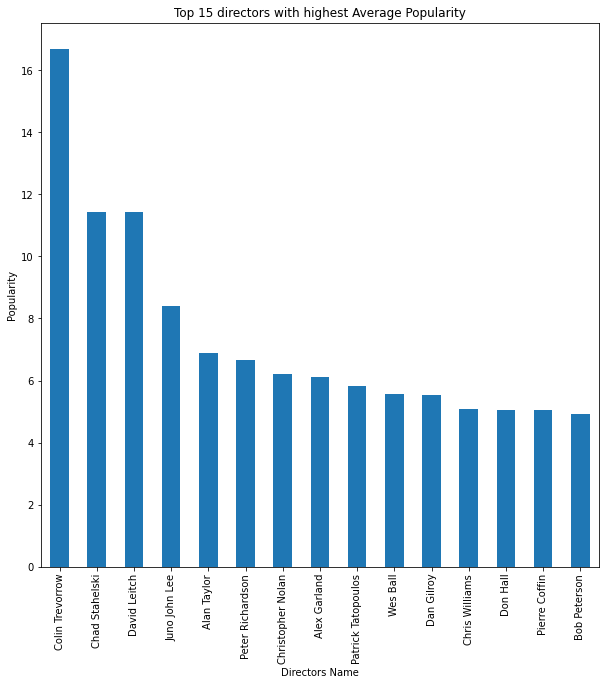

In [ ]:
most_popular_directors.plot(kind='bar', xlabel='Directors Name', ylabel='Popularity', title='Top 15 directors with highest Average Popularity')
plt.show()

**Colin Trevorrow is the director with the highest average popularity**

# **Which directors are the most profitable?**

In [ ]:
profitable_directors = df_director.groupby('director').mean()['profit'].sort_values(ascending = False)[:15]
profitable_directors 

director
Pierre Coffin       8.173356e+08
Colin Trevorrow     6.833933e+08
David Yates         6.758591e+08
Lee Unkrich         6.191573e+08
Robert Stromberg    5.784104e+08
J.J. Abrams         5.678340e+08
Jennifer Lee        5.621095e+08
Bob Peterson        5.563427e+08
Chris Miller        5.319728e+08
Conrad Vernon       5.260900e+08
Jennifer Yuh        5.156923e+08
James Cameron       5.081849e+08
Shane Black         5.081126e+08
John Stevenson      5.017446e+08
George Lucas        4.926661e+08
Name: profit, dtype: float64

**The most profitable director is Pierre Coffin**

# **Conclusion**

From the analysis, I tried to answer 9 different questions from tmdb movie dataset. 
* Movies with high popularity tend to be profitable.
* There is a very strong correlation between profit and revenue. 
* The movie Avatar directed by  James Cameron is the most profitable in the dataset
* However, Pierre Coffin is the most profitable director in the Dataset
* Jurassic World is the most popular movie
*  The Story of Film: An Odyssey is the movie with the highest vote average
*  Robert De Niro and Samuel L. Jackson acted 72 and 71 movies respectively from 1960 to 2015
*   Movie genre ADVENTURE has the highest popularity (14 times) from 1960 to 2015
* Movie genre DRAMA is the most produce genre(17.74%) from year 1960 to 2015
* It is worth noting that the most popular director doesn't translate to the most profitable director as shown in the  analysis. 
*  Pierre Coffin is the only director in the list most profitable and popular directors.



**LIMITATION**

It is worth noting that correlation doesnot mean correlation
"Very strong correlation between profit and revenue"

# **REFERENCES**



1.   https://pandas.pydata.org/docs/reference/index.html
2.   https://numpy.org/doc/stable/reference/array_api.html


